In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
warnings.filterwarnings('ignore')

In [2]:
train_dir = r"Data\Testing"

# Fetch class labels and count files for each class
class_labels = os.listdir(train_dir)
class_counts = [len(os.listdir(os.path.join(train_dir, label))) for label in class_labels]

In [3]:
data_summary = pd.DataFrame({
    'Class': class_labels,
    'Count': class_counts
})

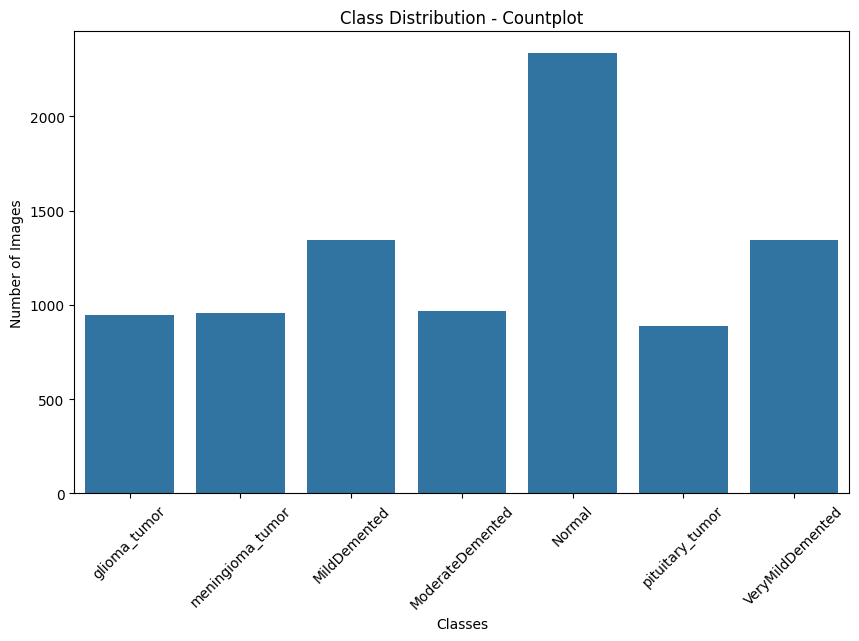

In [4]:
# Countplot: Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=data_summary, x='Class', y='Count')
plt.title('Class Distribution - Countplot')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

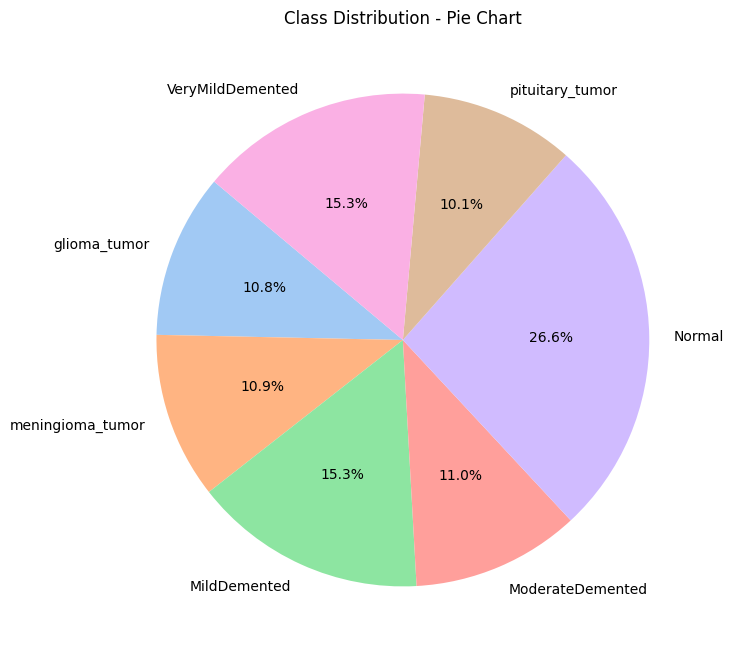

In [5]:
# Pie chart: Proportional distribution of classes
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Class Distribution - Pie Chart')
plt.show()

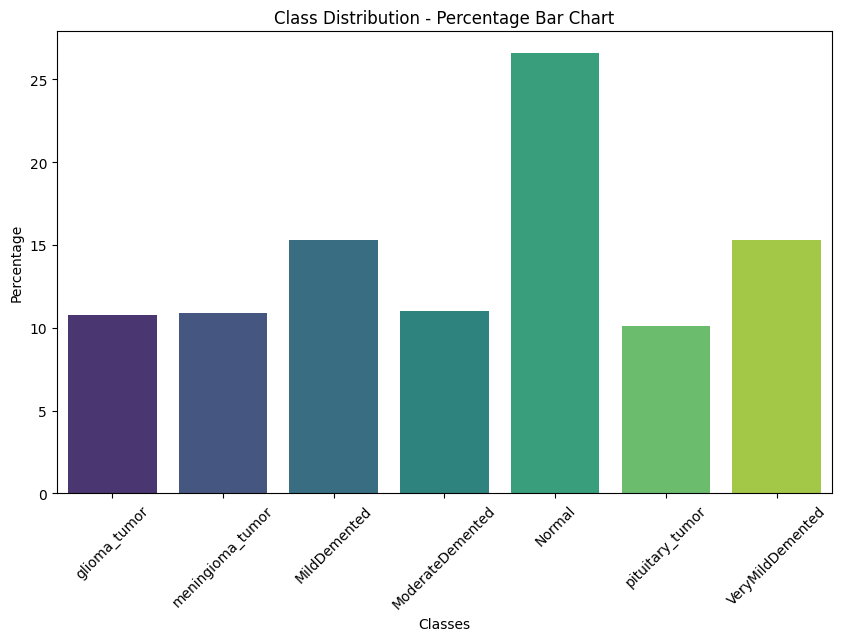

In [6]:
# Bar chart with percentages
total_count = sum(class_counts)
data_summary['Percentage'] = (data_summary['Count'] / total_count) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Percentage', data=data_summary, palette="viridis")
plt.title('Class Distribution - Percentage Bar Chart')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:
train_generator = train_datagen.flow_from_directory(
    r"Data\Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    r"Data\Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    r"Data\Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 40974 images belonging to 7 classes.
Found 8787 images belonging to 7 classes.
Found 8782 images belonging to 7 classes.


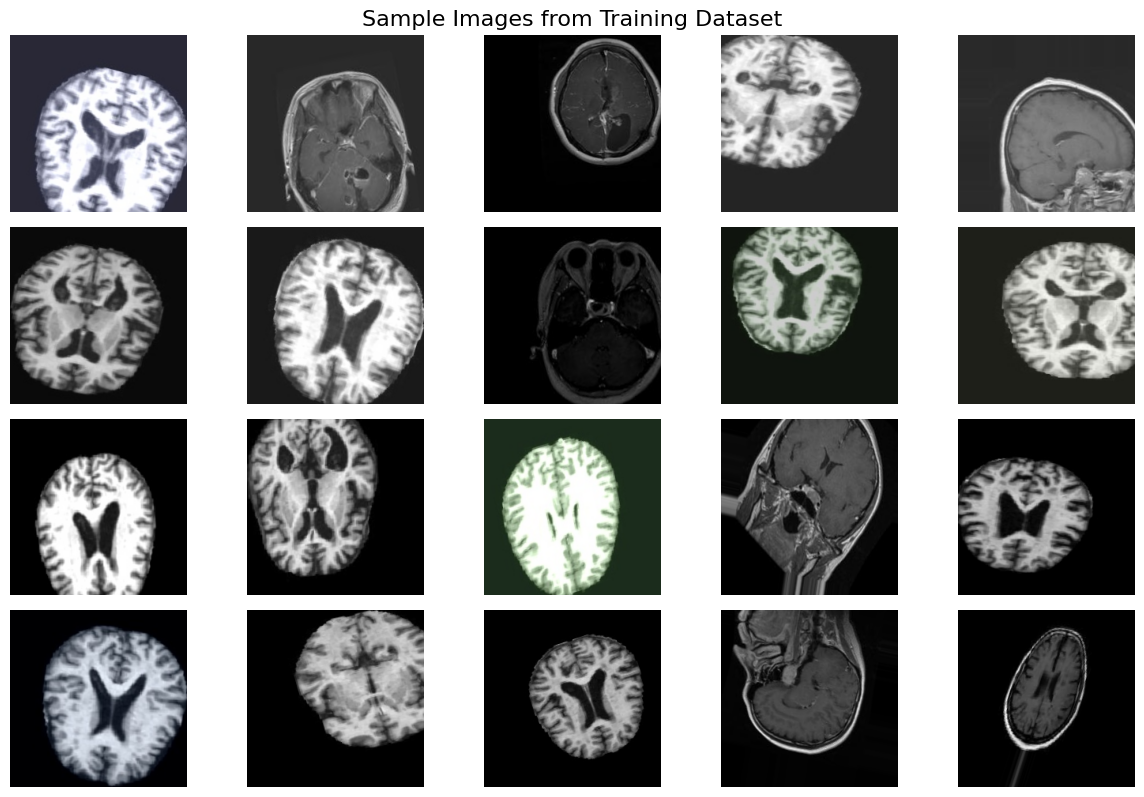

In [9]:
# Display 6x6 grid of sample images from the training dataset
def display_sample_images(generator, title):
    images, labels = next(generator)
    plt.figure(figsize=(12, 12))
    for i in range(20):
        plt.subplot(6, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

display_sample_images(train_generator, "Sample Images from Training Dataset")

In [10]:
# Load the model
model = tf.keras.models.load_model('model.h5')

In [11]:
# Predictions on test data
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# Get validation accuracy
val_loss, val_accuracy = model.evaluate(validation_generator)

275/275 ━━━━━━━━━━━━━━━━━━━━ 149s 538ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 155s 549ms/step - accuracy: 0.9329 - loss: 0.1591


In [12]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.96      0.95      0.96      1345
meningioma_tumor       1.00      1.00      1.00       970
    MildDemented       0.91      0.93      0.92      2334
ModerateDemented       0.85      0.83      0.84      1345
          Normal       0.98      0.96      0.97       947
 pituitary_tumor       0.97      0.97      0.97       959
VeryMildDemented       0.97      1.00      0.98       887

        accuracy                           0.94      8787
       macro avg       0.95      0.95      0.95      8787
    weighted avg       0.94      0.94      0.94      8787



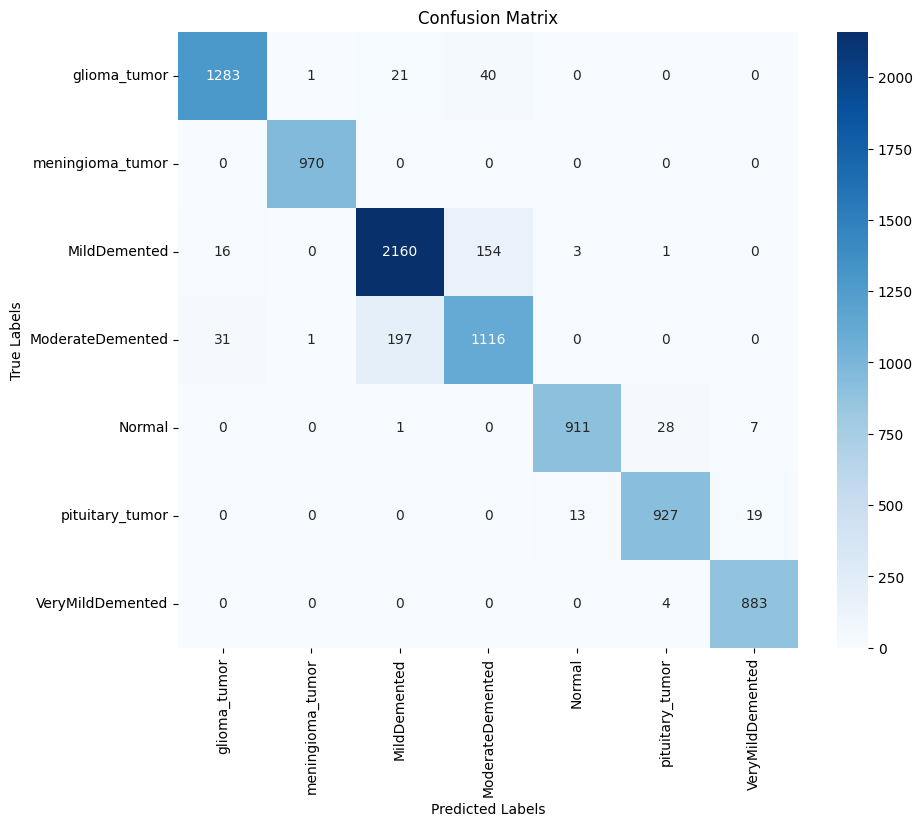

In [13]:
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Display Test accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 93.89%


In [15]:
# Display Validation accuracy
print(f"Validation Accuracy: {val_accuracy:.2f}")

Validation Accuracy: 0.94


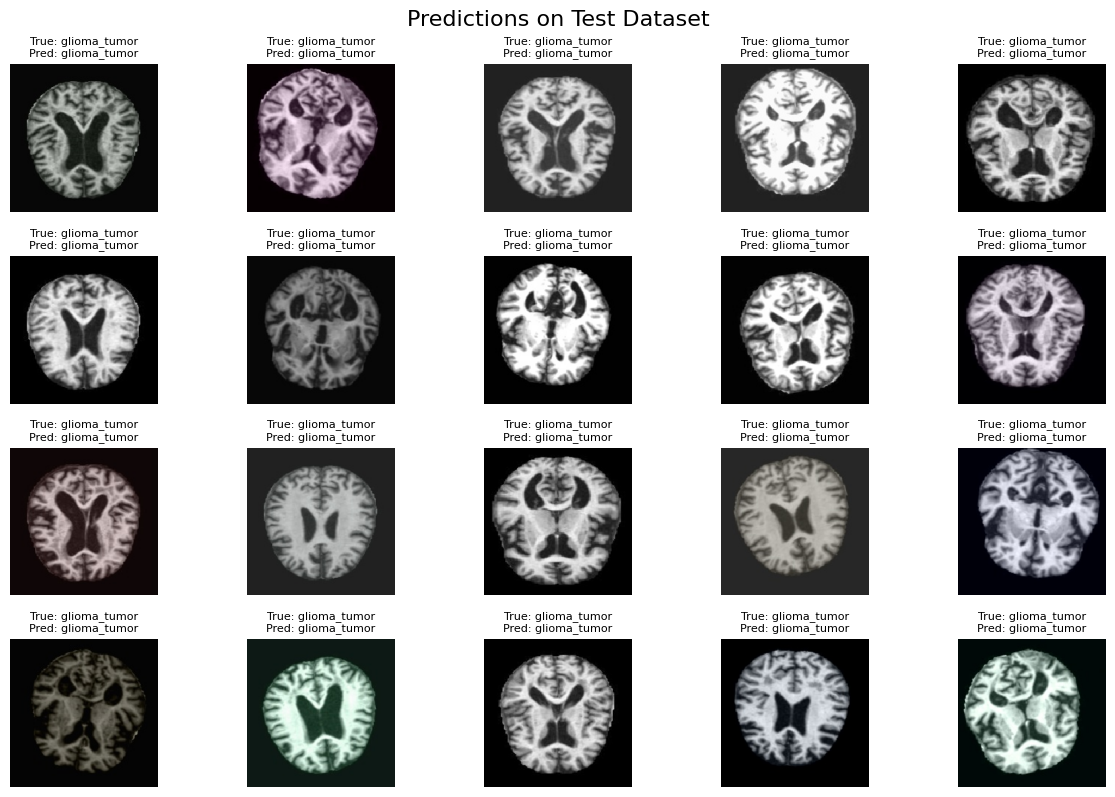

In [16]:
# Display predictions
def display_predictions(generator, y_true, y_pred):
    images, _ = next(generator)
    plt.figure(figsize=(12, 12))
    for i in range(20):  # Display 36 images
        plt.subplot(6, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        true_label = class_labels[y_true[i]]
        pred_label = class_labels[y_pred[i]]
        plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=8)
    plt.suptitle("Predictions on Test Dataset", fontsize=16)
    plt.tight_layout()
    plt.show()

display_predictions(test_generator, y_true, y_pred)